In [4]:
# TODO - graphical analysis of the dataset's regression

In [5]:
# TODO - train / dev / test dataset splitting

In [6]:
import numpy as np
import pandas as pd
dataset = pd.read_csv("parkinsons_updrs.data")

x_dtf=dataset[['Jitter(Abs)', 'Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]
y_dtf=dataset["motor_UPDRS"]

x = np.array(x_dtf)
y = np.array(y_dtf)

train_ratio = 0.8
dev_ratio = 0.1
#ivs_ratio = 0.1
train_len = int(len(x)*train_ratio)
dev_len = int(len(x)*dev_ratio)
#test_len = int(len(x)*ivs_ratio)

x_train = x[:train_len]
y_train = y[:train_len]

x_dev = x[train_len:train_len+dev_len]
y_dev = y[train_len:train_len+dev_len]

x_ivs = x[train_len+dev_len:]
y_ivs = y[train_len+dev_len:]

print(dataset)

      subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0        

In [7]:

from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn import tree



dt = tree.DecisionTreeRegressor(min_samples_leaf=1) # {"squared_error", "friedman_mse", "absolute_error", "poisson"}
model = dt.fit(x_train,y_train)


preds=model.predict(x_dev)

print("The RVE is: ", explained_variance_score(y_dev, preds))
print("The rmse is: ", mean_squared_error(y_dev, preds, squared=False))
corr, pval=pearsonr(y_dev, preds)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

print("The Maximum Error is is: ", max_error(y_dev, preds))
print("The Mean Absolute Error is: ", mean_absolute_error(y_dev, preds))

#import matplotlib.pyplot as plt
#plt.figure(figsize=(15,15))
#r=tree.plot_tree(model, filled=True)
#plt.show()

The RVE is:  -1.345813279800291
The rmse is:  12.794275355567098
The Correlation Score is is: -0.0882 (p-value=3.261283e-02)

The Maximum Error is is:  31.047299999999996
The Mean Absolute Error is:  10.228527427597955


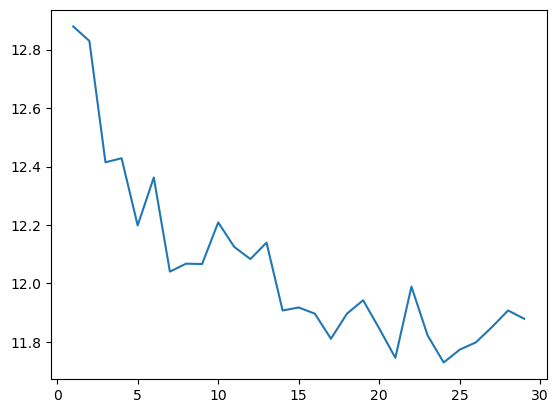

In [8]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plot

x = []
y = []
for min in range(1,30):
    rt = tree.DecisionTreeRegressor(min_samples_leaf=min)
    rt.fit(x_train,y_train)

    preds=rt.predict(x_dev)
    rmse = mean_squared_error(y_dev, preds, squared=False)
    #print("Min = {} ; rmse = {}".format(min,rmse))

    x.append(min)
    y.append(rmse)

plot.plot(x,y)



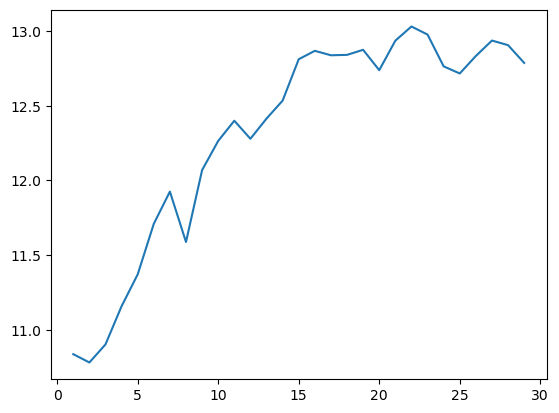

In [9]:

x = []
y = []
for max in range(1,30):
    rt = tree.DecisionTreeRegressor(max_depth=max)
    rt.fit(x_train,y_train)

    preds=rt.predict(x_dev)
    rmse = mean_squared_error(y_dev, preds, squared=False)
    #print("Min = {} ; rmse = {}".format(min,rmse))

    x.append(max)
    y.append(rmse)

plot.plot(x,y)



In [10]:
"""
#my solution
import json
results = list()

for min_sl in range(1,10):
    mdl = tree.DecisionTreeRegressor(min_samples_leaf=min_sl)
    mdl.fit(x_train, y_train)
    preds = mdl.predict(x_test)

    RVE=explained_variance_score(y_test, preds)
    rmse=mean_squared_error(y_test, preds, squared=False)
    corr, pval=pearsonr(y_test, preds)
    corr_score="%6.4f (p-value=%e)\n"%(corr,pval)
    max_error_r=max_error(y_test, preds)
    mean_absolute_error_r=mean_absolute_error(y_test, preds)

    print("The RVE is: ", RVE)
    print("The rmse is: ", rmse)
    print("The Correlation Score is is: " + corr_score)

    print("The Maximum Error is is: ", max_error_r)
    print("The Mean Absolute Error is: ", mean_absolute_error_r)

    res = {
        "min_samples": min_sl,
        
        "RVE": RVE,
        "rmse": rmse,
        "corr_score": corr_score,
        "max_error": max_error_r,
        "mean_absolute_error": mean_absolute_error_r
    }
    results.append(res)
    
for min_sl in range(1,10):
    for max_d in range(1,10):
        mdl = DecisionTreeClassifier(min_samples_leaf=min_sl,max_depth=max_d)
        mdl.fit(X_train, y_train)
        preds = mdl.predict(X_test)

        precision_s=precision_score(y_test, preds)
        recall_s=recall_score(y_test, preds)
        f1_s=f1_score(y_test, preds)
        matthews_corrcoeficient=matthews_corrcoef(y_test, preds)

        #print("Min Samples Leaf: {} ; Max Depth: {}".format(min_sl,max_d))
        #print("The Precision is: %7.4f" % precision_s)
        #print("The Recall is: %7.4f" % recall_s)
        #print("The F1 score is: %7.4f" % f1_s)
        #print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoeficient)
        #print()

        res = {
            "min_samples": min_sl,
            "max_depth": max_d,
            
            "precision": precision_s,
            "recall": recall_s,
            "f1": f1_s,
            "matthews_correlation_coeficient": matthews_corrcoeficient
        }
        results.append(res)
        
#pretty = json.dumps(results, indent=4)
#print(pretty)
max_precision = max(results, key=lambda x: x['precision'])
print("Max Precision: {}".format(max_precision))
max_recall = max(results, key=lambda x: x['recall'])
print("Max Recall: {}".format(max_recall))
max_f1 = max(results, key=lambda x: x['f1'])
print("Max F1: {}".format(max_f1))
max_mathew_corrcoef = max(results, key=lambda x: x['matthews_correlation_coeficient'])
print("Max Mathews Correlation Coeficient: {}".format(max_mathew_corrcoef))


"""

'\n#my solution\nimport json\nresults = list()\n\nfor min_sl in range(1,10):\n    mdl = tree.DecisionTreeRegressor(min_samples_leaf=min_sl)\n    mdl.fit(x_train, y_train)\n    preds = mdl.predict(x_test)\n\n    RVE=explained_variance_score(y_test, preds)\n    rmse=mean_squared_error(y_test, preds, squared=False)\n    corr, pval=pearsonr(y_test, preds)\n    corr_score="%6.4f (p-value=%e)\n"%(corr,pval)\n    max_error_r=max_error(y_test, preds)\n    mean_absolute_error_r=mean_absolute_error(y_test, preds)\n\n    print("The RVE is: ", RVE)\n    print("The rmse is: ", rmse)\n    print("The Correlation Score is is: " + corr_score)\n\n    print("The Maximum Error is is: ", max_error_r)\n    print("The Mean Absolute Error is: ", mean_absolute_error_r)\n\n    res = {\n        "min_samples": min_sl,\n        \n        "RVE": RVE,\n        "rmse": rmse,\n        "corr_score": corr_score,\n        "max_error": max_error_r,\n        "mean_absolute_error": mean_absolute_error_r\n    }\n    results.

In [11]:
from distutils.command.build_scripts import first_line_re
import itertools


criterions = ["squared_error", "friedman_mse", "absolute_error","poisson"]
#criterions = ["squared_error", "absolute_error"]
#splitters = ["best", "random"]
splitters = ["best"]
max_depths = range(10,100,10)
#max_features = ["auto", "sqrt", "log2"]
max_features = ["sqrt", "log2", None]
min_samples_leaf = range(1,30,1)
min_samples_splits = range(2,30,1)
#... other hyper params

hyperparams_combinations = itertools.product(criterions, splitters, max_depths, max_features, min_samples_leaf, min_samples_splits)


first_loop = True
def validation_results(params):
    criterion, splitter, max_depth, max_features, min_samples_leaf, min_sample_split = params

    mdl = tree.DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features,min_samples_leaf=min_samples_leaf,min_samples_split=min_sample_split)
    mdl.fit(x_train, y_train)
    preds = mdl.predict(x_dev)

    RVE=explained_variance_score(y_dev, preds)
    #rmse=mean_squared_error(y_dev, preds, squared=False)
    #corr, pval=pearsonr(y_dev, preds)
    #corr_score="%6.4f (p-value=%e)\n"%(corr,pval)
    #max_error_r=max_error(y_dev, preds)
    #mean_absolute_error_r=mean_absolute_error(y_dev, preds)

    r = {
        "params": { 
            "criterion": criterion,
            "splitter": splitter,
            "max_depth": max_depth,
            "max_features": max_features,
            "min_samples_leaf": min_samples_leaf,
            "min_sample_split": min_sample_split
        },

        "RVE": RVE,
        #"rmse": rmse,
        #"corr_score": corr_score,
        #"max_error_r": max_error_r,
        #"mean_absolute_error_r": mean_absolute_error_r
    }
    #if first_loop:
    #    print(results_l[0])
    #    first_loop = False
    return r

results_l = [ validation_results(p) for p in hyperparams_combinations ]
    

#print(results_l)
results_params = [ x["params"] for x in results_l ]
results_RVE = [ x["RVE"] for x in results_l ]
#results_rmse = [ x["rmse"] for x in results_l ]
#results_corr_score = [ x["corr_score"] for x in results_l ]
#results_max_error_r = [ x["max_error_r"] for x in results_l ]
#results_mean_absolute_error_r = [ x["mean_absolute_error_r"] for x in results_l ]

results = pd.DataFrame({
    "params": results_params,
    "RVE": results_RVE,
    #"rmse": results_rmse,
    #"corr_score": results_corr_score,
    #"max_error_r": results_max_error_r,
    #"mean_absolute_error_r": results_mean_absolute_error_r
})
results.to_csv("./test_results.csv")

KeyboardInterrupt: 

In [ ]:
results = pd.read_csv("./test_results_1.csv")

best_RVE = results["RVE"].max()
_RVE_best_params = results.loc[results['RVE'] == best_RVE]
RVE_best_params =dict(_RVE_best_params["params"])

print("RVE: {} with params: {}".format(best_RVE, RVE_best_params))

#rmse_best = results["rmse"].min()
#_rmse_best_params = results.loc[results['rmse'] == rmse_best]
#rmse_best_params = dict(_rmse_best_params["params"])

#print("best_rmse: {} with params {}".format(rmse_best, rmse_best_params))

#best_pcorr_score = results["corr_score"].max()
#_pcorr_score_best_params = results.loc[results['corr_score'] == best_pcorr_score]
#pcorr_score_best_params =dict(_pcorr_score_best_params["params"])

#print("best_pcorr_score: {} with params {}".format(best_pcorr_score, pcorr_score_best_params))

#print(results.loc[results['corr_score'] == best_pcorr_score])

# Maximum Error
# Mean Absolute Error


FileNotFoundError: [Errno 2] No such file or directory: './test_results_1.csv'

In [ ]:
import ast
print("Metrics with IVS sets (focusing RVE):")
RVE_best_params=_RVE_best_params["params"].to_dict()
ix = list(RVE_best_params)[0]
RVE_best_params=ast.literal_eval(RVE_best_params[ix])
print(RVE_best_params)

criterion=RVE_best_params["criterion"]
splitter=RVE_best_params["splitter"]
max_depth=RVE_best_params["max_depth"]
max_features=RVE_best_params["max_features"]
min_samples_leaf=RVE_best_params["min_samples_leaf"]
min_samples_split=RVE_best_params["min_sample_split"]

mdl = tree.DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
mdl.fit(x_train, y_train)
preds = mdl.predict(x_dev)

print(f"RVE, {explained_variance_score(y_dev, preds)}")
print(f"rmse, {mean_squared_error(y_dev, preds, squared=False)}")
corr, pval=pearsonr(y_dev, preds)
print("corr_score, %6.4f (p-value=%e)"%(corr,pval))
print(f"max_error_r, {max_error(y_dev, preds)}")
print(f"mean_absolute_error_r, {mean_absolute_error(y_dev, preds)}")

Metrics with IVS sets (focusing RVE):
{'criterion': 'friedman_mse', 'splitter': 'best', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 17, 'min_sample_split': 10}
RVE, -0.8111298311484267
rmse, 12.262063542419893
corr_score, -0.3974 (p-value=1.204912e-23)
max_error_r, 26.414704166666667
mean_absolute_error_r, 9.599377799637484


# Simple cross for Classification

Data Preparation

In [27]:

y_dtf=dataset["total_UPDRS"]

y = np.array([ 1 if y_val > 40 else 0 for y_val in y_dtf.to_list() ])
print(np.sum(y==1) / len(y))

y_train = y[:train_len]

y_dev = y[train_len:train_len+dev_len]

y_ivs = y[train_len+dev_len:]

#print(dataset)

0.1712340425531915


In [ ]:
from distutils.command.build_scripts import first_line_re
import itertools
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix


criterions = ["gini", "entropy", "log_loss"]
#splitters = ["best", "random"]
splitters = ["best", None]
max_depths = range(10,100,10)
#max_features = ["auto", "sqrt", "log2"]
max_features = ["sqrt", "log2", None]
min_samples_leaf = range(1,30,1)
min_samples_splits = range(2,30,1)
#... other hyper params

hyperparams_combinations = itertools.product(criterions, splitters, max_depths, max_features, min_samples_leaf, min_samples_splits)


first_loop = True
def validation_results(params):
    criterion, splitter, max_depth, max_features, min_samples_leaf, min_sample_split = params

    mdl = tree.DecisionTreeClassifier(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features,min_samples_leaf=min_samples_leaf,min_samples_split=min_sample_split)
    mdl.fit(x_train, y_train)
    preds = mdl.predict(x_dev)

    F1=f1_score(y_dev, preds)
        #print("The Precision is: %7.4f" % precision_score(y_test, preds))
        #print("The Recall is: %7.4f" % recall_score(y_test, preds))
        #print("The F1 score is: %7.4f" % f1_score(y_test, preds))
        #print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))

    r = {
        "params": { 
            "criterion": criterion,
            "splitter": splitter,
            "max_depth": max_depth,
            "max_features": max_features,
            "min_samples_leaf": min_samples_leaf,
            "min_sample_split": min_sample_split
        },
        
        "F1": F1,
        #print("The Precision is: %7.4f" % precision_score(y_test, preds))
        #print("The Recall is: %7.4f" % recall_score(y_test, preds))
        #print("The F1 score is: %7.4f" % f1_score(y_test, preds))
        #print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))
    }
    #if first_loop:
    #    print(results_l[0])
    #    first_loop = False
    return r

results_l = [ validation_results(params) for params in hyperparams_combinations ]
    

#print(results_l)
results_params = [ x["params"] for x in results_l ]
results_F1 = [ x["F1"] for x in results_l ]

        #print("The Precision is: %7.4f" % precision_score(y_test, preds))
        #print("The Recall is: %7.4f" % recall_score(y_test, preds))
        #print("The F1 score is: %7.4f" % f1_score(y_test, preds))
        #print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))

results = pd.DataFrame({
    "params": results_params,
    "F1": results_F1,

        #print("The Precision is: %7.4f" % precision_score(y_test, preds))
        #print("The Recall is: %7.4f" % recall_score(y_test, preds))
        #print("The F1 score is: %7.4f" % f1_score(y_test, preds))
        #print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))
})
results.to_csv("./test_results_f1.csv")

In [41]:
import pandas as pd
results = pd.read_csv("./dropped/test_results_f1.csv")
print(results)

       Unnamed: 0                                             params        F1
0               0  {'criterion': 'gini', 'splitter': 'best', 'max...  0.107744
1               1  {'criterion': 'gini', 'splitter': 'best', 'max...  0.015385
2               2  {'criterion': 'gini', 'splitter': 'best', 'max...  0.044118
3               3  {'criterion': 'gini', 'splitter': 'best', 'max...  0.029851
4               4  {'criterion': 'gini', 'splitter': 'best', 'max...  0.054608
...           ...                                                ...       ...
65767       65767  {'criterion': 'log_loss', 'splitter': 'best', ...  0.000000
65768       65768  {'criterion': 'log_loss', 'splitter': 'best', ...  0.000000
65769       65769  {'criterion': 'log_loss', 'splitter': 'best', ...  0.000000
65770       65770  {'criterion': 'log_loss', 'splitter': 'best', ...  0.000000
65771       65771  {'criterion': 'log_loss', 'splitter': 'best', ...  0.000000

[65772 rows x 3 columns]


In [55]:
import ast
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
print("Metrics with IVS sets (focusing F1):")
np.random.seed(42)
import random
random.seed(42)
F1_best_params=results["params"].to_dict()
#F1_best_params=F1_best_params.to_dict()
ix = list(F1_best_params)[0]
F1_best_params=ast.literal_eval(F1_best_params[ix])
print(F1_best_params)
#F1_best_params=results["params"].to_dict()
#ix = list(F1_best_params)[0]
#F1_best_params=F1_best_params[ix]
#F1_best_params=ast.literal_eval(F1_best_params[ix])
print(F1_best_params)

criterion=F1_best_params["criterion"]
splitter=F1_best_params["splitter"]
max_depth=F1_best_params["max_depth"]
max_features=F1_best_params["max_features"]
min_samples_leaf=F1_best_params["min_samples_leaf"]
min_samples_split=F1_best_params["min_sample_split"]

mdl = tree.DecisionTreeClassifier(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
mdl.fit(x_train, y_train)
preds = mdl.predict(x_dev)

print("The Precision is: %7.4f" % precision_score(y_dev, preds))
print("The Recall is: %7.4f" % recall_score(y_dev, preds))
print("The F1 score is: %7.4f" % f1_score(y_dev, preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_dev, preds))

Metrics with IVS sets (focusing F1):
{'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_sample_split': 2}
{'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_sample_split': 2}
The Precision is:  0.1667
The Recall is:  0.0123
The F1 score is:  0.0230
The Matthews correlation coefficient is: -0.0893
